https://medium.com/@kole.audu/predicting-high-school-students-grades-with-machine-learning-regression-3479781c185c

Read more about: <br>
Hot Encoder, (Pandas: get_dummies), (scikit learn is onehotencoder) <br>
https://youtu.be/v_4KWmkwmsU
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
<br><br>
Very good guide to categorical variables with seaborn<br>
https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

<h1>Student Grade Prediction - Kaggle Competition - </h1>
Objective of this exercise is to predict final grade (Feature Name: G3). 
<br>
For reference check: <a href="https://www.kaggle.com/dipam7/student-grade-prediction">Kaggle</a>

<a name='index'></a>
<h2>1. INDEX</h2>
<ul>
    <li><a href='#load'>Load, Clean and Explore Data</a></li>
    <li><a href='#imbalance'>Dealing with Imbalanced Data</a></li>
    <li><a href='#split'>Splitting Data</a></li>
    <li><a href='#lr'>Linear Regression</a></li>
    <li><a href='#opt'>Finetuning using GridSearchCV</a></li>
    <li><a href='#comparison'>Comparison - Tuned vs Untuned Model</a></li>
    <li><a href='#cv'>Cross Validation</a></li>
    <li><a href='#glos'>Glossary</a></li>
    <br><br>
    <li><a href='#iss'>Issue</a></li>
</ul>

<a name='intro'></a>
<h2>2. INTRODUCTION</h2>

<H2>3. LOAD LIBRARIES</H2>

In [1]:
import time
import sys
import math

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # data split
 
# Scale features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

# Handle all my imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV

from sklearn.linear_model import LinearRegression # Linear regression
from sklearn.linear_model import Ridge            # Ridge Regression L2 - Regularization  
from sklearn.linear_model import Lasso            # Lasso Regression L1 - Regularization 

# from xgboost import XGBRegressor
import xgboost as xg

# Cross Validation
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import mean_squared_error


<h2>4. MISCELLANEOUS</h2>

In [2]:
""" This funciton When called out measures time of execution of cell """
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
   return round(diff_time/60, 0);
""" 
How to use:
In measured cell add \"start \" before measured code and \"end \" at the end of measured cell    
start = time.time()
...
...
end = time.time()
exec_time(start,end)

"""

' \nHow to use:\nIn measured cell add "start " before measured code and "end " at the end of measured cell    \nstart = time.time()\n...\n...\nend = time.time()\nexec_time(start,end)\n\n'

<a href='#index'>Back to Index</a>
<a name='load'></a>
<h2>5. LOAD, CLEAN AND EXPLORE DATA</h2>

In [3]:
# Load Data into pandas dataframe
df = pd.read_csv("student-mat.csv")

#Extend number of columns to display
pd.set_option("max_columns", 33) 

# Check the shape and Basic Statistical Description of each column in dataset
print("Shape: ", df.shape, "\n\nDescribtion: \n", df.describe())

Shape:  (395, 33) 

Describtion: 
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.55

<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<h3>Explanation of dimensions present in the dataset</h3>
<table>
  <tr>
    <th>Feature Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td colspan="2" style="align:right;"><strong>BINARY DATA:</strong></td>
  </tr>
  <tr>
    <td>school</td>
    <td>student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>student's sex (binary: 'F' - female or 'M' - male)</td>
  </tr>
  <tr>
    <td>address</td>
    <td>student's home address type (binary: 'U' - urban or 'R' - rural)</td>
  </tr>
  <tr>
    <td>famsize</td>
    <td>family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</td>
  </tr>
  <tr>
    <td>Pstatus</td>
    <td>parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</td>
  </tr>
  <tr>
    <td>schoolsup</td>
    <td>extra educational support (binary: yes or no)</td>
  </tr>
  <tr>
    <td>famsup</td>
    <td>family educational support (binary: yes or no)</td>
  </tr>
  <tr>
    <td>paid</td>
    <td>extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</td>
  </tr>
  <tr>
    <td>activities</td>
    <td>extra-curricular activities (binary: yes or no)</td>
  </tr>
  <tr>
    <td>nursery</td>
    <td>attended nursery school (binary: yes or no)</td>
  </tr>
  <tr>
    <td>higher</td>
    <td>wants to take higher education (binary: yes or no)</td>
  </tr>
  <tr>
    <td>internet</td>
    <td>Internet access at home (binary: yes or no)</td>
  </tr>
  <tr>
    <td>romantic</td>
    <td>with a romantic relationship (binary: yes or no)</td>
  </tr>
  <tr>
    <td colspan="2" style="align:right;"><strong>NUMERIC DATA:</strong></td>
  </tr>
  <tr>
    <td>age</td>
    <td>student's age (numeric: from 15 to 22)</td>
  </tr>
  <tr>
    <td>Medu</td>
    <td>mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 at 5th to 9th grade, 3 at secondary education or 4 at higher education)</td>
  </tr>
  <tr>
    <td>Fedu</td>
    <td>father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 at 5th to 9th grade, 3 at secondary education or 4 at higher education)</td>
  </tr>
  <tr>
    <td>traveltime</td>
    <td>home to school travel time (numeric: 1 - 1 hour)</td>
  </tr>
  <tr>
    <td>studytime</td>
    <td> weekly study time (numeric: 1 - 10 hours)</td>
  </tr>
  <tr>
    <td>failures</td>
    <td> number of past class failures (numeric: n if 1<=n<3, else 4)</td>
  </tr>
  <tr>
    <td>famrel</td>
    <td> quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</td>
  </tr>
  <tr>
    <td>freetime</td>
    <td>free time after school (numeric: from 1 - very low to 5 - very high)</td>
  </tr>
  <tr>
    <td>goout</td>
    <td>going out with friends (numeric: from 1 - very low to 5 - very high)</td>
  </tr>
  <tr>
    <td>Dalc</td>
    <td>workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</td>
  </tr>
  <tr>
    <td>Walc</td>
    <td>weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</td>
  </tr>  
  <tr>
    <td>health</td>
    <td>current health status (numeric: from 1 - very bad to 5 - very good)</td>
  </tr>  
  <tr>
    <td>absences</td>
    <td>number of school absences (numeric: from 0 to 93)</td>
  </tr>
  <tr>
    <td>G1</td>
    <td>first period grade (numeric: from 0 to 20)</td>
  </tr> 
  <tr>
    <td>G2</td>
    <td>second period grade (numeric: from 0 to 20)</td>
  </tr> 
  <tr>
    <td>G3</td>
    <td>final grade (numeric: from 0 to 20, output target)</td>
  </tr> 
  <tr>
    <td colspan="2" style="align:right;"><strong>NOMINAL DATA:</strong></td>
  </tr>
  <tr>
    <td>Mjob</td>
    <td>mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</td>
  </tr> 
  <tr>
    <td>Fjob</td>
    <td>father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</td>
  </tr> 
  <tr>
    <td>reason</td>
    <td>reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</td>
  </tr> 
  <tr>
    <td>guardian</td>
    <td>student's guardian (nominal: 'mother', 'father' or 'other')</td>
  </tr> 
</table>

</body>
</html>


In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# Replace empty data with nan:
df = df.replace('', np.nan)

# Check if there are any nan data:
if len([df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))])==0 :
    print("No empty records")
else:
    for i,j in zip(*np.where(pd.isnull(df))):
        df.iloc[i,j]

No empty records


In [6]:
# There are not too many categorical data labels,
# so let us have a look what these unique labels are in each column:

print(df["G3"].name, ": ",df["G3"].unique())

G3 :  [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


Lets have a look at correlations between all the factors:

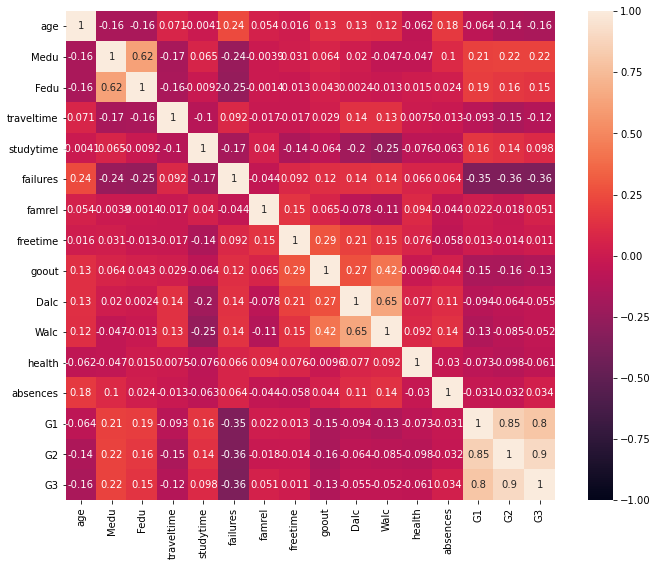

In [7]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat,vmin = -1, vmax = 1, square = True, annot=True)
plt.show()

As it can be seen on heatmap above: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).
<br><br>
Paper source:<br>
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


Plot items with highest correlation as it is shown here: <br>
https://www.youtube.com/watch?v=i6iUCs0D9nk&ab_channel=DataTalks

Text(0.5, 0, ' Yes or No')

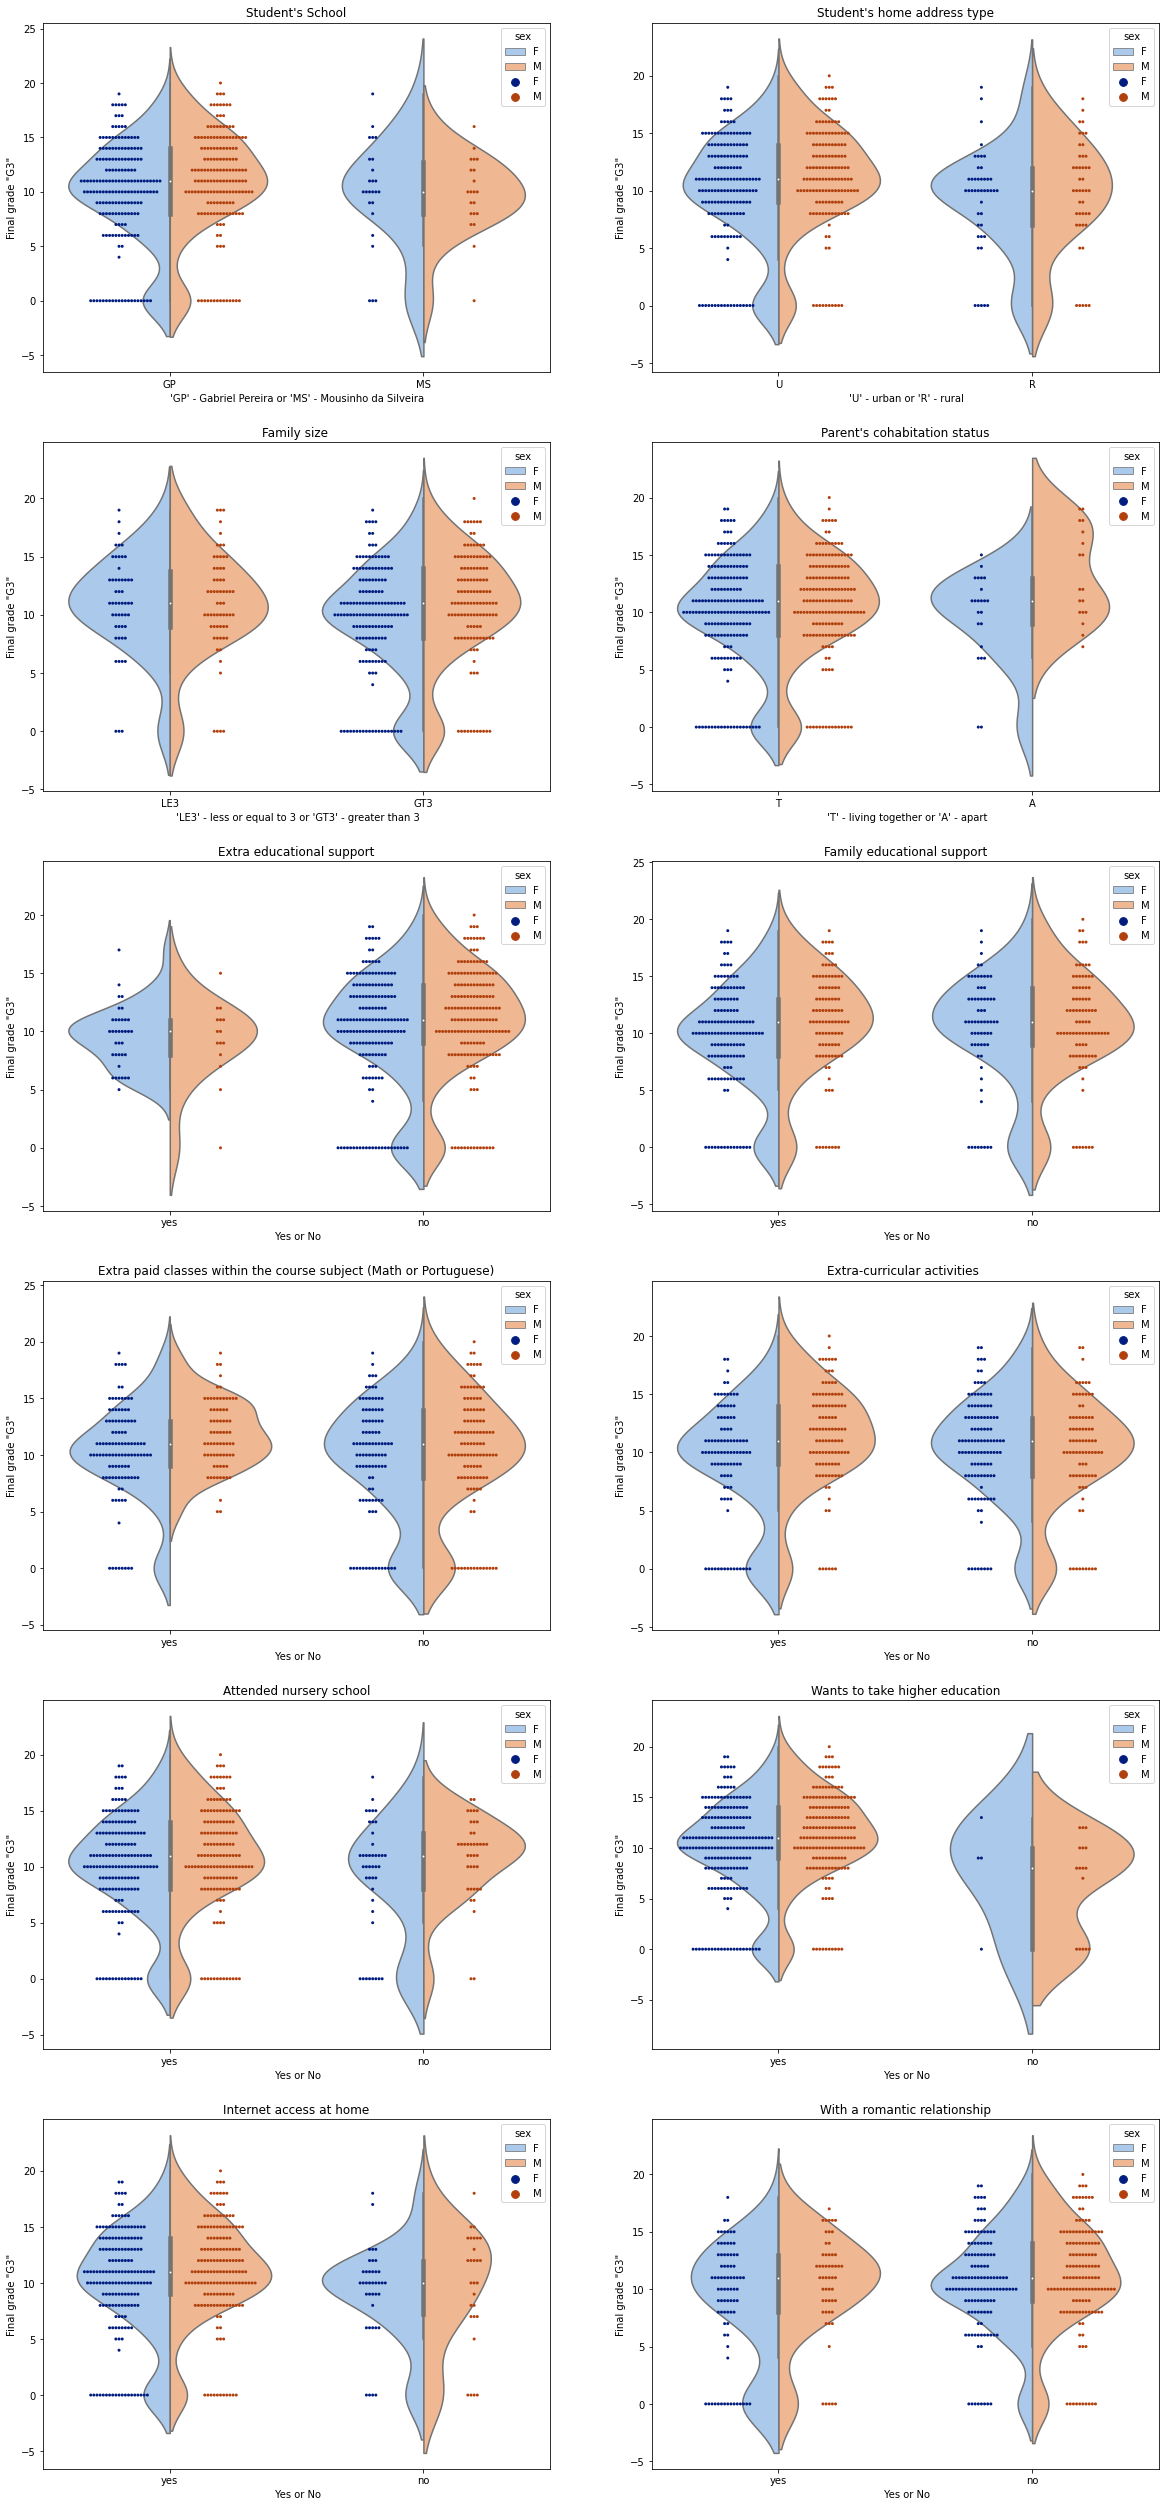

In [8]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8),
      (ax9, ax10), (ax11, ax12) ) = plt.subplots(6,2, figsize=(20,45))

sns.violinplot(data=df, x="school",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax1)
sns.swarmplot(data=df, x='school',y="G3",hue="sex", dodge='True', alpha=1, s=3,palette = "dark", ax = ax1)
ax1.set_title("Student's School")
ax1.set_ylabel("Final grade \"G3\"")
ax1.set_xlabel("'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira")

sns.violinplot(data=df, x="address",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax2)
sns.swarmplot(data=df, x='address',y="G3",hue="sex", dodge='True', alpha=1, s=3,palette = "dark", ax = ax2)
ax2.set_title("Student's home address type")
ax2.set_ylabel("Final grade \"G3\"")
ax2.set_xlabel(" 'U' - urban or 'R' - rural")

sns.violinplot(data=df, x="famsize",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax3, order=['LE3', 'GT3'])
sns.swarmplot(data=df, x='famsize',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax3, order=['LE3', 'GT3'])
ax3.set_title("Family size ")
ax3.set_ylabel("Final grade \"G3\"")
ax3.set_xlabel(" 'LE3' - less or equal to 3 or 'GT3' - greater than 3")

sns.violinplot(data=df, x="Pstatus",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax4, order=['T', 'A'])
sns.swarmplot(data=df, x='Pstatus',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax4, order=['T', 'A'])
ax4.set_title("Parent's cohabitation status")
ax4.set_ylabel("Final grade \"G3\"")
ax4.set_xlabel(" 'T' - living together or 'A' - apart")

sns.violinplot(data=df, x="schoolsup",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax5, order=['yes', 'no'])
sns.swarmplot(data=df, x='schoolsup',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax5, order=['yes', 'no'])
ax5.set_title("Extra educational support")
ax5.set_ylabel("Final grade \"G3\"")
ax5.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="famsup",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax6, order=['yes', 'no'])
sns.swarmplot(data=df, x='famsup',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax6, order=['yes', 'no'])
ax6.set_title("Family educational support")
ax6.set_ylabel("Final grade \"G3\"")
ax6.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="paid",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax7, order=['yes', 'no'])
sns.swarmplot(data=df, x='paid',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax7, order=['yes', 'no'])
ax7.set_title("Extra paid classes within the course subject (Math or Portuguese)")
ax7.set_ylabel("Final grade \"G3\"")
ax7.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="activities",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax8, order=['yes', 'no'])
sns.swarmplot(data=df, x='activities',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax8, order=['yes', 'no'])
ax8.set_title("Extra-curricular activities ")
ax8.set_ylabel("Final grade \"G3\"")
ax8.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="nursery",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax9, order=['yes', 'no'])
sns.swarmplot(data=df, x='nursery',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax9, order=['yes', 'no'])
ax9.set_title("Attended nursery school")
ax9.set_ylabel("Final grade \"G3\"")
ax9.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="higher",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax10, order=['yes', 'no'])
sns.swarmplot(data=df, x='higher',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax10, order=['yes', 'no'])
ax10.set_title("Wants to take higher education")
ax10.set_ylabel("Final grade \"G3\"")
ax10.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="internet",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax11, order=['yes', 'no'])
sns.swarmplot(data=df, x='internet',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax11, order=['yes', 'no'])
ax11.set_title("Internet access at home")
ax11.set_ylabel("Final grade \"G3\"")
ax11.set_xlabel(" Yes or No")

sns.violinplot(data=df, x="romantic",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel", ax = ax12, order=['yes', 'no'])
sns.swarmplot(data=df, x='romantic',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark", ax = ax12, order=['yes', 'no'])
ax12.set_title("With a romantic relationship")
ax12.set_ylabel("Final grade \"G3\"")
ax12.set_xlabel(" Yes or No")

<a href='#index'>Back to Index</a>
<a name='bin'></a>
<h2>8. Map binary data (Y or N to 0 or 1)</h2>


In [9]:
df_bin = df.copy()
# student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
df_bin['b_school']  = df.school.map({'GP':0, 'MS':1})

# student's sex (binary: 'F' - female or 'M' - male)
df_bin['b_sex']  = df_bin.sex.map({'F':0, 'M':1})

# student's home address type (binary: 'U' - urban or 'R' - rural)
df_bin['b_address']  = df_bin.address.map({'U':0, 'R':1})

# family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
df_bin['b_famsize']  = df_bin.famsize.map({'LE3':0, 'GT3':1})

# parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
df_bin['b_Pstatus'] = df_bin.Pstatus.map({'T':0, 'A':1})

# extra educational support (binary: yes or no)
df_bin['b_schoolsup'] = df_bin.schoolsup.map({'no':0, 'yes':1})

# family educational support (binary: yes or no)
df_bin['b_famsup'] = df_bin.famsup.map({'no':0, 'yes':1})

# extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
df_bin['b_paid'] = df_bin.paid.map({'no':0, 'yes':1})

# extra-curricular activities (binary: yes or no)
df_bin['b_activities'] = df_bin.activities.map({'no':0, 'yes':1})

# attended nursery school (binary: yes or no)
df_bin['b_nursery'] = df_bin.nursery.map({'no':0, 'yes':1})

# wants to take higher education (binary: yes or no)
df_bin['b_higher'] = df_bin.higher.map({'no':0, 'yes':1})

# Internet access at home (binary: yes or no)
df_bin['b_internet'] = df_bin.internet.map({'no':0, 'yes':1})

# with a romantic relationship (binary: yes or no)
df_bin['b_romantic'] = df_bin.romantic.map({'no':0, 'yes':1})


df_bin = df_bin.drop(['school', 'sex','address','famsize','Pstatus',
                      'schoolsup','famsup','paid','activities',
                      'nursery','higher','internet','romantic'], axis=1)
df_bin.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,b_school,b_sex,b_address,b_famsize,b_Pstatus,b_schoolsup,b_famsup,b_paid,b_activities,b_nursery,b_higher,b_internet,b_romantic
0,18,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,0,1,1,1,0,0,0,1,1,0,0
1,17,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,0,1,0,0,1,0,0,0,1,1,0
2,15,1,1,at_home,other,other,mother,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,0,0,0,1,0,1,0,1,1,1,0
3,15,4,2,health,services,home,mother,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,other,other,home,father,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,0,1,0,0,1,1,0,1,1,0,0


<h3>Remove Grades From Data Frame</h3>


In [10]:
df_bin = df_bin.drop(['G1', 'G2','G3'], axis=1)
df_bin.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,b_school,b_sex,b_address,b_famsize,b_Pstatus,b_schoolsup,b_famsup,b_paid,b_activities,b_nursery,b_higher,b_internet,b_romantic
0,18,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,6,0,0,0,1,1,1,0,0,0,1,1,0,0
1,17,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,4,0,0,0,1,0,0,1,0,0,0,1,1,0
2,15,1,1,at_home,other,other,mother,1,2,3,4,3,2,2,3,3,10,0,0,0,0,0,1,0,1,0,1,1,1,0
3,15,4,2,health,services,home,mother,1,3,0,3,2,2,1,1,5,2,0,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,other,other,home,father,1,2,0,4,3,2,1,2,5,4,0,0,0,1,0,0,1,1,0,1,1,0,0


<a href='#index'>Back to Index</a>
<a name='ohe'></a>
<h2>9. One Hot Encoding for Categorical Data</h2>

<h3>9.1 Categorical Data Exploration</h3>

In [11]:
# Tuple with categorical data column names:
cat_data = ("Mjob", "Fjob", "reason","guardian")

In [12]:
# Check how many unique labels has each column with categorical data:
for col in df_bin.columns:
  if df_bin[col].name in cat_data:
    print(col, ": ",len(df_bin[col].unique()), 'labels')

Mjob :  5 labels
Fjob :  5 labels
reason :  4 labels
guardian :  3 labels


In [13]:
# There are not too many categorical data labels,
# so let us have a look what these unique labels are in each column:
for col in df_bin.columns:
  if df_bin[col].name in cat_data:
    print(df_bin[col].name, ": ",df_bin[col].unique())

Mjob :  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob :  ['teacher' 'other' 'services' 'health' 'at_home']
reason :  ['course' 'other' 'home' 'reputation']
guardian :  ['mother' 'father' 'other']


Text(0.5, 0, "Student's Guardian")

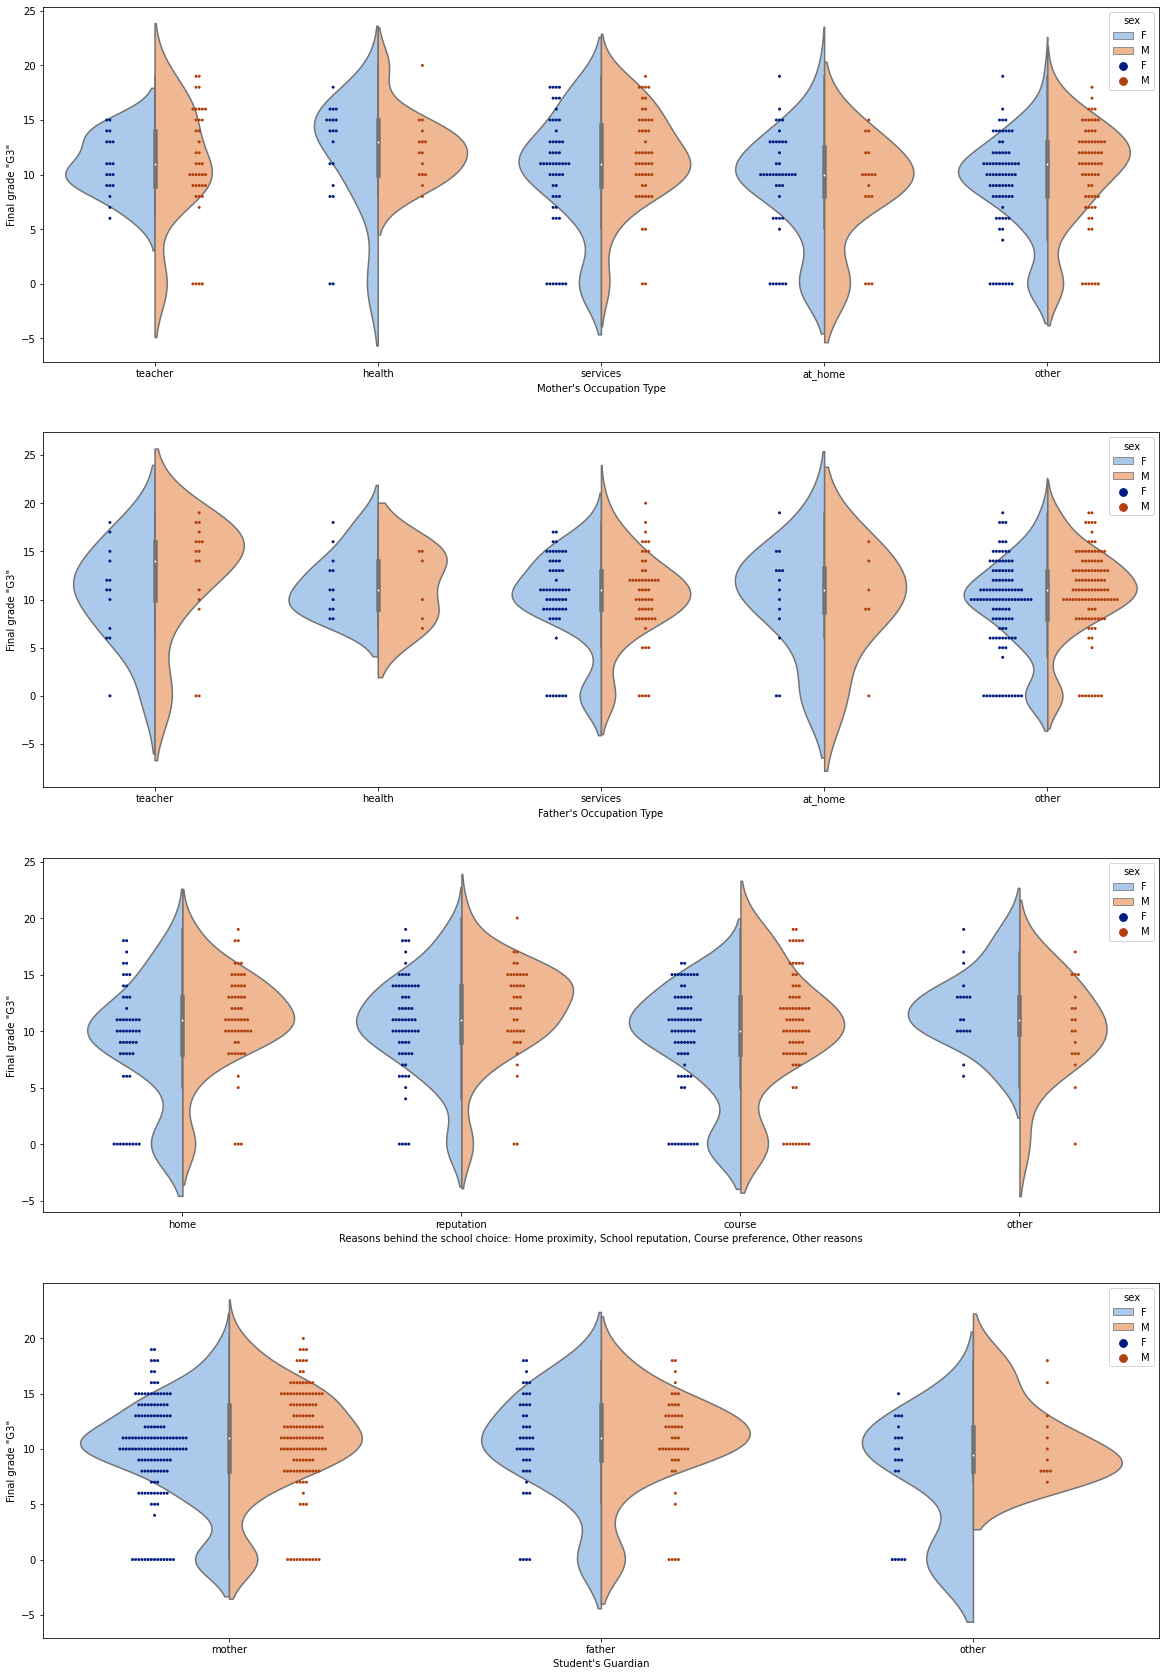

In [14]:
figB, (axB1, axB2, axB3, axB4)= plt.subplots(4,1,figsize=(20,30))

sns.violinplot(data=df, x="Mjob",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel",
               ax = axB1, order=['teacher', 'health', 'services', 'at_home', 'other'])
sns.swarmplot(data=df, x='Mjob',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark",
              ax = axB1, order=['teacher', 'health', 'services', 'at_home', 'other'])
axB1.set_title("")
axB1.set_ylabel("Final grade \"G3\"")
axB1.set_xlabel("Mother's Occupation Type")

sns.violinplot(data=df, x="Fjob",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel",
               ax = axB2, order=['teacher', 'health', 'services', 'at_home', 'other'])
sns.swarmplot(data=df, x='Fjob',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark",
              ax = axB2, order=['teacher', 'health', 'services', 'at_home', 'other'])
axB2.set_title("")
axB2.set_ylabel("Final grade \"G3\"")
axB2.set_xlabel("Father's Occupation Type")

sns.violinplot(data=df, x="reason",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel",
               ax = axB3, order=['home', 'reputation', 'course', 'other'])
sns.swarmplot(data=df, x='reason',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark",
              ax = axB3, order=['home', 'reputation', 'course', 'other'])
axB3.set_title("")
axB3.set_ylabel("Final grade \"G3\"")
axB3.set_xlabel("Reasons behind the school choice: Home proximity, School reputation, Course preference, Other reasons")

sns.violinplot(data=df, x="guardian",y = "G3",hue="sex",split='True', kind="violin", alpha = .5, palette = "pastel",
               ax = axB4, order=['mother', 'father', 'other'])
sns.swarmplot(data=df, x='guardian',y="G3",hue="sex", dodge='True', alpha=1, s=3, palette = "dark",
              ax = axB4, order=['mother', 'father', 'other'])
axB4.set_title("")
axB4.set_ylabel("Final grade \"G3\"")
axB4.set_xlabel("Student's Guardian")


<h3>9.2 One Hot Encoding Manually</h3>
Pandas offers “.get_dummies()” and Scikit-learn offers “OneHotEncoder()” to encode categorical variables into hot keys. <br><br>
However, the first attempt in this file is done manually as in some circumstances this might be beneficial. Good example where it might be worth to do it manually can be found in:<br>
<a href=" https://www.youtube.com/watch?v=6WDFfaYtN6s&ab_channel=KrishNaik">Video</a><br>
<a href="http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf">Paper</a>  


In [15]:
# Categorical data column names. Defined above, here just for refernce:
# cat_data = ("Mjob", "Fjob", "reason","guardian")

# function that creates dummy variables inplace of categorical data
# Input: uses dataframe with categorical data 
#        and list or tupule with column names
#        containing categorical data 
# Output: Dataframe with categorical data replaced with dummy values 
def one_hot_top(data, categorical):
  for d_cat in categorical:
    labels =  data[d_cat].unique()
    for label in labels:
      data[d_cat+'_'+label] = np.where(data[d_cat]==label,1,0)
    
    data = data.drop(d_cat, axis = 1) 
  # Return modified data frame 
  return data

# Call function that creates dummy variables inplace of categorical data
df_ohe1 = one_hot_top(df_bin, cat_data)
 

# pd.set_option('display.max_columns', None)
# pd.set_option('max_columns', None)
# pd.set_option('max_columns', 20)
# pd.reset_option('max_columns', None)
df_ohe1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,b_school,b_sex,b_address,...,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_teacher,Fjob_other,Fjob_services,Fjob_health,Fjob_at_home,reason_course,reason_other,reason_home,reason_reputation,guardian_mother,guardian_father,guardian_other
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


<h3>9.3 One Hot Encoding Using Pandas</h3>
Pandas offers “.get_dummies()” to encode categorical variables into hot keys. <br>
Here we will use just this Pandas functionality.

In [16]:
# Categorical data column names. Defined above, here just for refernce:
# cat_data = ("Mjob", "Fjob", "reason","guardian")

# Convert to one hot encoder
df_ohe2 = df_bin.copy()
for category in cat_data:
  df_ohe2 = pd.get_dummies(df_ohe2, columns=[category], prefix=[category], drop_first=True)

df_ohe2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,b_school,b_sex,b_address,...,Mjob_other,Mjob_services,Mjob_teacher,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


<h3>9.3 One Hot Encoding Using Scikit-learn</h3>
Scikit-learn offers “OneHotEncoder()” to encode categorical variables into hot keys. <br> 
<strong>NOTE</strong> Output of "OneHotEncoder()" is a numpy array instead of pandas dataframe.<br>
Here we will use just this Scikit-learn functionality.<br>
Good description of how to use "OneHotEncoder()" as well as how to use pipline to combine data preprocessing as well model training can be found <a href="https://www.youtube.com/watch?v=irHhDMbw3xo&ab_channel=DataSchool">here</a>. <br> Go to 18 min where it is shown how to use "OneHotEncoder()"

In [17]:
# Categorical data column names. Defined above, here just for refernce:
# cat_data = ("Mjob", "Fjob", "reason","guardian")

# How do I encode categorical features using scikit-learn?
# https://www.youtube.com/watch?v=irHhDMbw3xo&ab_channel=DataSchool
# 18 min


# Convert to one hot encoder
# column_trans = make_column_transformer(
#     (OneHotEncoder(), cat_data), 
#     remainder='passthrough')

column_trans = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_data), 
    remainder='passthrough')

column_trans.fit_transform(df_bin)

# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=1000)

<a href='#index'>Back to Index</a>
<a name='lr'></a>
<h2>8. Linear Regression</h2>
Linear Regression is one of the simplest machine learning algorithms. Often used as setting up baseline model for further evaluation. The predicted parameters (trained weights) give inference about the importance of each feature.

In [18]:
# Split Data
x = df_bin.loc[:,:]
y = df.G3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 66)

In [19]:
start = time.time()

# Linear Regression
lr = LinearRegression()

pipe_lr = make_pipeline(column_trans, MinMaxScaler(), lr)

print(round(cross_val_score(pipe_lr, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean(),2))

lr_model = pipe_lr.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)


# print(math.sqrt(root_mean_squared_error(y_test, lr_y_pred)))
print(mean_squared_error(y_test, lr_y_pred, squared = False))
end = time.time()
time_lr = exec_time(start,end)

-4.38
4.894682960278997
Execution Time: 00:00:00


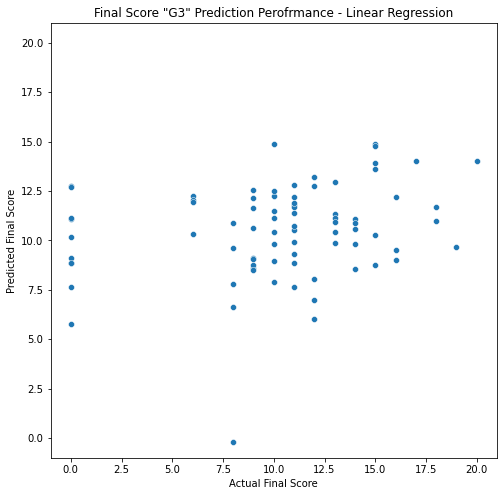

In [20]:
figC, axC1 = plt.subplots(figsize=(8,8))
sns.scatterplot(x = y_test, y = lr_y_pred, ax = axC1)
axC1.set_title('Final Score "G3" Prediction Perofrmance - Linear Regression')
axC1.set_xlabel("Actual Final Score")
axC1.set_ylabel("Predicted Final Score")
axC1.set_xbound(lower=-1, upper=21)
axC1.set_ybound(lower=-1, upper=21)

<a href='#index'>Back to Index</a>
<a name='ls'></a>
<h2>9.Lasso Regression -  L1 Regularization </h2>

In [21]:
start = time.time()

parameters = {'lasso__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
              'lasso__fit_intercept': [True,False],
              # 'lasso__tol': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
              'lasso__tol': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ls_pipe_line = make_pipeline(column_trans, MinMaxScaler(), Lasso())

# print(ls_pipe_line.get_params().keys())

ls_cv = GridSearchCV(ls_pipe_line, param_grid = parameters, scoring='neg_root_mean_squared_error', cv = 5, refit=True)

ls_cv.fit(x_train, y_train)
ls_y_pred = ls_cv.predict(x_test)



end = time.time()
time_lr = exec_time(start,end)

Execution Time: 00:00:15


In [22]:
ls_opt_mse_os = ls_cv.best_score_
ls_opt_mse_param_os = ls_cv.best_params_

print(ls_opt_mse_os)
print(ls_opt_mse_param_os)

# print(math.sqrt(root_mean_squared_error(y_test, lr_y_pred)))
print(mean_squared_error(y_test, ls_y_pred, squared = False))

-4.377392699944322
{'lasso__alpha': 0.01, 'lasso__fit_intercept': False, 'lasso__tol': 1}
4.600860034928161


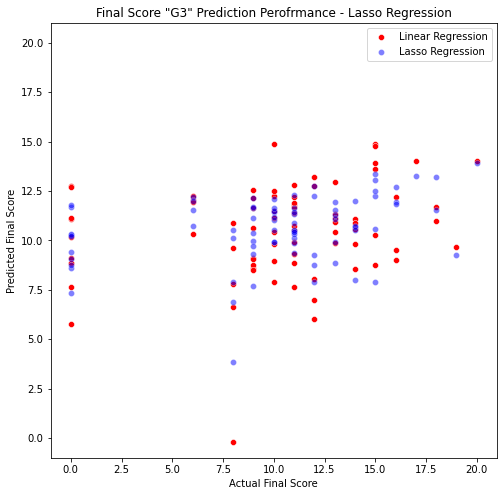

In [23]:
ls_cv.score(x_test,y_test)
ls_opt_mse_pred_os_2 = ls_cv.predict(x_test)

figD, axD1 = plt.subplots(figsize=(8,8))

sns.scatterplot(x = y_test, y = lr_y_pred, alpha=1, color="red", label="Linear Regression", ax = axD1)
sns.scatterplot(x = y_test, y = ls_opt_mse_pred_os_2, alpha=0.5, color="blue", label="Lasso Regression", ax = axD1)

axD1.set_title('Final Score "G3" Prediction Perofrmance - Lasso Regression')
axD1.set_xlabel("Actual Final Score")
axD1.set_ylabel("Predicted Final Score")
axD1.set_xbound(lower=-1, upper=21)
axD1.set_ybound(lower=-1, upper=21)

<a href='#index'>Back to Index</a>
<a name='rg'></a>
<h2>9. Ridge Regression -  L2 Regularization </h2>

<strong>Attempt 1</strong><br>
To get the gridSearchCV object from the pipeline, and then call best_params_ on it.
<a href="https://stackoverflow.com/questions/49829236/extract-best-params-after-running-gridsearch-within-a-pipeline"></a>

In [24]:
start = time.time()

# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
              'fit_intercept': [True,False],
              'solver':[ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag','saga']}

pipe_line = Pipeline([
                      ('col_trans', column_trans),
                      ('standardize', MinMaxScaler()),
                      ('grid_search_rg', GridSearchCV(Ridge(),
                                                      param_grid = parameters,
                                                      scoring='neg_root_mean_squared_error',
                                                      cv = 5, refit=True))
                      ])

pipe_line.fit(x_train, y_train)


# print(round((pipe_line.predict(x_test).mean() - y_test.mean())/y_test.mean(),2)*100,"%")
# # This won't work beacuse 'Pipeline' object has no attribute 'GridSearchCV'
pipe_line.named_steps['grid_search_rg'].best_params_
pipe_line.named_steps['grid_search_rg'].best_score_


end = time.time()
time_lr = exec_time(start,end)
print()

Execution Time: 00:00:03



In [25]:
rg_opt_mse_os_1 = pipe_line.named_steps['grid_search_rg'].best_score_
rg_opt_mse_param_os_1 = pipe_line.named_steps['grid_search_rg'].best_params_

print(rg_opt_mse_os_1)
print(rg_opt_mse_param_os_1)

-4.312048925927786
{'alpha': 20, 'fit_intercept': True, 'solver': 'sparse_cg'}


<strong>Attempt 2</strong><br>
This should work but for some reason does not recognise parameters.

In [26]:
start = time.time()

parameters = {'ridge__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
              'ridge__fit_intercept': [True,False],
              'ridge__solver':[ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag','saga']}

pipe_line = make_pipeline(column_trans, MinMaxScaler(), Ridge())

# print(pipe_line.get_params().keys())

ridge = GridSearchCV(pipe_line, param_grid = parameters, scoring='neg_root_mean_squared_error', cv = 5, refit=True)
# ridge = GridSearchCV(pipe_line, param_grid = parameters, cv = 5, refit=True)

ridge.fit(x_train, y_train)
l2_y_pred = ridge.predict(x_test)

end = time.time()
time_lr = exec_time(start,end)

Execution Time: 00:00:10


In [27]:
rg_opt_mse_os_2 = ridge.best_score_
rg_opt_mse_param_os_2 = ridge.best_params_

print(rg_opt_mse_os_2)
print(rg_opt_mse_param_os_2)
print(mean_squared_error(y_test, lr_y_pred, squared = False))

-4.312686220378155
{'ridge__alpha': 20, 'ridge__fit_intercept': True, 'ridge__solver': 'saga'}
4.894682960278997


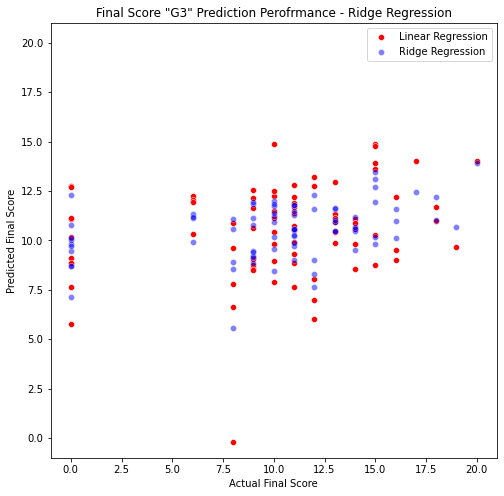

In [28]:
ridge.score(x_test,y_test)
rg_opt_mse_pred_os_2 = ridge.predict(x_test)
# plt.scatter(y_test,rg_opt_mse_pred_os_2)

figE, axE1 = plt.subplots(figsize=(8,8))

sns.scatterplot(x = y_test, y = lr_y_pred, alpha=1, color="red", label="Linear Regression", ax = axE1)
sns.scatterplot(x = y_test, y = rg_opt_mse_pred_os_2, alpha=0.5, color="blue", label="Ridge Regression", ax = axE1)

axE1.set_title('Final Score "G3" Prediction Perofrmance - Ridge Regression')
axE1.set_xlabel("Actual Final Score")
axE1.set_ylabel("Predicted Final Score")
axE1.set_xbound(lower=-1, upper=21)
axE1.set_ybound(lower=-1, upper=21)




<strong>Very good description of using GridSearchCV and make_pipline!!!</strong><br>
https://towardsdatascience.com/an-introduction-to-building-pipelines-and-using-grid-searches-in-scikit-learn-92ea72f9b5b7

<strong>Seaborn Scatter Plot - Tutorial and Examples</strong><br>
https://www.tutorialspoint.com/scikit_learn/scikit_learn_linear_regression.htm

<strong>Finding A Mentor In Data Science!!!</strong><br>
https://towardsdatascience.com/finding-a-mentor-in-data-science-9863de5b3620

Feature Engineering-How to Perform One Hot Encoding for Multi Categorical Variables <br>
https://www.youtube.com/watch?v=6WDFfaYtN6s&ab_channel=KrishNaik<br>

Perform Linear regression with Ridge and Lasso Regression using Python and Sklearn<br>
https://www.youtube.com/watch?v=0yI0-r3Ly40&ab_channel=KrishNaik


<br>
Scikit-learn metrics and scoring: quantifying the quality of predictions
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter <br>
Performing Hyper Parameter Tuning Using Pipeline In Sklearn- Machine Learning<br>
https://www.youtube.com/watch?v=DHxsNrL7Zfw&ab_channel=KrishNaik
<br>
How do I encode categorical features using scikit-learn?<br>
https://www.youtube.com/watch?v=irHhDMbw3xo&t=1268s&ab_channel=DataSchool

<br><br>
<strong>How to tune hyper parameters using Grid Search CV | With and without a Pipeline | Machine Learning</strong><br>
https://www.youtube.com/watch?v=KzIQ3G_TEFg&ab_channel=RachitToshniwal


<a href='#index'>Back to Index</a>
<a name='xgb'></a>
<h2>10. XGBoost</h2>

<strong>Using scikit-learn API</strong><br>

In [29]:
start = time.time()

parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__learning_rate': [0.1, 0.01, 0.05], #so called `eta` value
              'xgbregressor__max_depth': range (3, 10, 2),
              'xgbregressor__min_child_weight': range(1,6,2),
              'xgbregressor__silent': [1],
              'xgbregressor__subsample': [0.5,0.6,0.7,0.8],
              'xgbregressor__colsample_bytree': [0.5,0.6,0.7,0.8],
              'xgbregressor__n_estimators': range(60, 220, 1000), #number of trees, change it to 1000 for better results
              'xgbregressor__missing':[-999], # Maximum number of boosting rounds (maximum numbers of trees) or "num_boost_round"
              'xgbregressor__seed': [42],
              'xgbregressor__early_stopping_rounds': [5], # Maximum number of boosting rounds (trees) without improvement after which it should stop
              'xgbregressor__reg_alpha': [1e-5,1e-2,0.1,1,10,100],
              'xgbregressor__gamma':[i/10.0 for i in range(0,5)]
              }

xgb_pipe_line = make_pipeline(column_trans, xg.XGBRegressor())

# print(xgb_pipe_line.get_params().keys())

xgb_gs = GridSearchCV(xgb_pipe_line, param_grid = parameters, scoring='neg_root_mean_squared_error', cv = 5, refit=True)

xgb_gs.fit(x_train, y_train)
xgb_y_pred = xgb_gs.predict(x_test)


end = time.time()
time_lr = exec_time(start,end)

Execution Time: 01:44:50


In [30]:
# # importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# xgb_gs.get_booster().get_score(importance_type='weight')

In [31]:
xgb_opt_mse_os = xgb_gs.best_score_
xgb_opt_mse_param_os = xgb_gs.best_params_

print(xgb_opt_mse_os)
print(xgb_opt_mse_param_os)
print(mean_squared_error(y_test, xgb_y_pred, squared = False))

-3.8603251608190696
{'xgbregressor__colsample_bytree': 0.8, 'xgbregressor__early_stopping_rounds': 5, 'xgbregressor__gamma': 0.1, 'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 5, 'xgbregressor__missing': -999, 'xgbregressor__n_estimators': 60, 'xgbregressor__nthread': 4, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__seed': 42, 'xgbregressor__silent': 1, 'xgbregressor__subsample': 0.5}
4.332199209572265


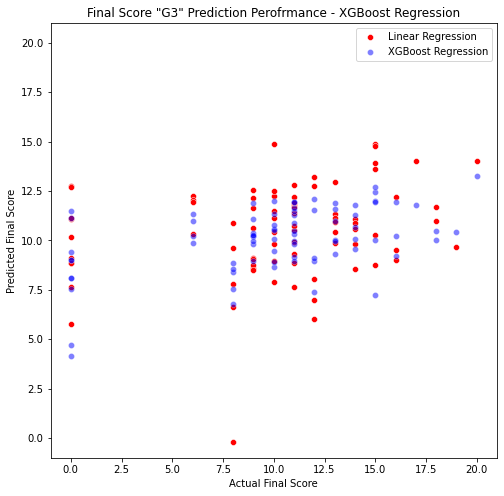

In [32]:
xgb_gs.score(x_test,y_test)
xgb_opt_mse_pred_os = xgb_gs.predict(x_test)

figE, axF1 = plt.subplots(figsize=(8,8))
# rp = sns.regplot(x=y_test, y=predictions)
sns.scatterplot(x = y_test, y = lr_y_pred, alpha=1, color="red", label="Linear Regression", ax = axF1)
sns.scatterplot(x = y_test, y = xgb_opt_mse_pred_os, alpha=0.5, color="blue", label="XGBoost Regression", ax = axF1)

axF1.set_title('Final Score "G3" Prediction Perofrmance - XGBoost Regression')
axF1.set_xlabel("Actual Final Score")
axF1.set_ylabel("Predicted Final Score")
axF1.set_xbound(lower=-1, upper=21)
axF1.set_ybound(lower=-1, upper=21)

<strong>Using XGBost API</strong><br>
Study the following:<br>
<a href="https://info.cambridgespark.com/latest/getting-started-with-xgboost">Getting started with XGBoost</a><br>
<a href="https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f">Hyperparameter tuning in XGBoost - (Search for xgboost with gridsearchcv in google)</a><br>
<a href="https://www.datacamp.com/community/tutorials/xgboost-in-python">Using XGBoost in Python(Visualize Boosting Trees and Feature Importance)</a><br>
<a href="https://xgboost.readthedocs.io/en/latest/tutorials/model.html">Introduction to Boosted Trees</a>

<a href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/">Complete Guide to Parameter Tuning in XGBoost with codes in Python</a>

<a href="https://meanderingscience.com/taking-the-aws-certified-machine-learning-specialty-exam/">TAKING THE AWS CERTIFIED MACHINE LEARNING – SPECIALTY EXAM</a>




In [33]:
column_trans.fit_transform(x_train)

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 66)
# column_trans.fit_transform(df_bin)
dtrain = xg.DMatrix(column_trans.fit_transform(x_train), label=y_train)
dtest = xg.DMatrix(column_trans.fit_transform(x_test), label=y_test)




In [35]:
params = {
    # Parameters that are going to be tuned.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}
# add evaluation metric to the params
params['eval_metric'] = "rmse"

In [36]:
model = xg.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:8.13337
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:6.44733
[2]	Test-rmse:5.33826
[3]	Test-rmse:4.86241
[4]	Test-rmse:4.58075
[5]	Test-rmse:4.45242
[6]	Test-rmse:4.36107
[7]	Test-rmse:4.33861
[8]	Test-rmse:4.36458
[9]	Test-rmse:4.40507
[10]	Test-rmse:4.4039
[11]	Test-rmse:4.44617
[12]	Test-rmse:4.42565
[13]	Test-rmse:4.42262
[14]	Test-rmse:4.43527
[15]	Test-rmse:4.40323
[16]	Test-rmse:4.40961
[17]	Test-rmse:4.41486
Stopping. Best iteration:
[7]	Test-rmse:4.33861



In [37]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 4.34 with 8 rounds


Cross-Validation of the Initial Model

In [38]:
cv_results = xg.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=66,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.070060,0.069702,8.201422,0.441881
1,6.073697,0.049167,6.512149,0.454497
2,4.677373,0.065787,5.480901,0.402217
3,3.724250,0.060212,4.881040,0.405719
4,3.054114,0.062412,4.502124,0.400143
5,2.558073,0.063395,4.327806,0.384061
6,2.184716,0.101967,4.208849,0.342123
7,1.928109,0.125324,4.166284,0.339402
8,1.738820,0.123646,4.153121,0.310453
9,1.546158,0.115663,4.151390,0.304735


Tuning

In [39]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [40]:
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xg.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=66,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
    )
    
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\t RMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight)
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
	 RMSE 4.1134135999999994 for 8 rounds
CV with max_depth=9, min_child_weight=6
	 RMSE 4.2403287999999995 for 6 rounds
CV with max_depth=9, min_child_weight=7
	 RMSE 3.9460449999999994 for 8 rounds
CV with max_depth=10, min_child_weight=5
	 RMSE 4.069855200000001 for 13 rounds
CV with max_depth=10, min_child_weight=6
	 RMSE 4.2077 for 9 rounds
CV with max_depth=10, min_child_weight=7
	 RMSE 3.9188544 for 9 rounds
CV with max_depth=11, min_child_weight=5
	 RMSE 4.0776824 for 9 rounds
CV with max_depth=11, min_child_weight=6
	 RMSE 4.1959524 for 8 rounds
CV with max_depth=11, min_child_weight=7
	 RMSE 3.9489229999999997 for 9 rounds
Best params: 10, 7, RMSE: 3.9188544


In [41]:
params['max_depth'] = 10
params['min_child_weight'] = 7

In [42]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [43]:
min_rmse = float("Inf")
best_params = None

# Start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    
    # Update parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xg.cv(
    params,
    dtrain,
    num_boost_round = 999,
    seed=66,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
    )
    
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample, colsample)
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))
    
    

CV with subsample=1.0, colsample=1.0
	RMSE 3.9188544 for 9 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 4.0560127999999995 for 14 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 4.2827658 for 9 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 4.27238 for 9 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 4.034096 for 10 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 3.9648108 for 13 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 4.1470338 for 9 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 4.1740956 for 8 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 4.0955455999999995 for 8 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 4.0959348 for 8 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 4.0611706 for 11 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 4.1704854000000005 for 11 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 4.021862799999999 for 8 rounds
CV with subsample=0.7, colsample=0.9
	RMSE 4.1569676 for 7 rounds
CV with subsample=0.7, colsample=0.8
	R

In [44]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [45]:
min_rmse = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta {}".format(eta))
    
    # Update parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xg.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=66,
    nfold=5,
    metrics = ['rmse'],
    early_stopping_rounds=10
    )
    
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
        
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))


    

CV with eta 0.3
	RMSE 3.9188544 for 9 rounds

CV with eta 0.2
	RMSE 4.1162928 for 13 rounds

CV with eta 0.1
	RMSE 4.011747000000001 for 34 rounds

CV with eta 0.05
	RMSE 3.9543894 for 71 rounds

CV with eta 0.01
	RMSE 3.9436974 for 347 rounds

CV with eta 0.005
	RMSE 3.9595566000000004 for 683 rounds

Best params: 0.3, RMSE: 3.9188544


In [46]:
params['eta'] = 0.3

In [47]:
model = xg.train(
params,
dtrain,
num_boost_round=999,
evals=[(dtest, "Test")],
early_stopping_rounds=10)

[0]	Test-rmse:8.1416
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:6.40663
[2]	Test-rmse:5.43206
[3]	Test-rmse:4.87563
[4]	Test-rmse:4.50439
[5]	Test-rmse:4.34964
[6]	Test-rmse:4.26271
[7]	Test-rmse:4.15946
[8]	Test-rmse:4.15178
[9]	Test-rmse:4.13886
[10]	Test-rmse:4.10201
[11]	Test-rmse:4.09646
[12]	Test-rmse:4.12675
[13]	Test-rmse:4.12884
[14]	Test-rmse:4.13592
[15]	Test-rmse:4.16699
[16]	Test-rmse:4.19979
[17]	Test-rmse:4.19965
[18]	Test-rmse:4.17849
[19]	Test-rmse:4.18863
[20]	Test-rmse:4.21848
[21]	Test-rmse:4.21312
Stopping. Best iteration:
[11]	Test-rmse:4.09646



In [48]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 4.10 in 12 rounds


In [49]:
num_boost_round = model.best_iteration + 1

best_model = xg.train(
params,
dtrain,
num_boost_round = num_boost_round,
evals = [(dtest, "Test")]
)

[0]	Test-rmse:8.1416
[1]	Test-rmse:6.40663
[2]	Test-rmse:5.43206
[3]	Test-rmse:4.87563
[4]	Test-rmse:4.50439
[5]	Test-rmse:4.34964
[6]	Test-rmse:4.26271
[7]	Test-rmse:4.15946
[8]	Test-rmse:4.15178
[9]	Test-rmse:4.13886
[10]	Test-rmse:4.10201
[11]	Test-rmse:4.09646


In [50]:
print(mean_squared_error(y_test, best_model.predict(dtest), squared = False))

4.096456612143745
